# Principal Component Analysis

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(23) #kallisti

plt.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['figure.dpi'] = 150
sns.set()

In [2]:
def compute_rank_k_approximation(data, k):
    u, s, vt = np.linalg.svd(data, full_matrices = False)
    return pd.DataFrame(u[:, 0:k] @ np.diag(s[0:k]) @ vt[0:k, :], columns = data.columns)

## Rank 1 Approximation of 2D Data, Data Centering

In [3]:
# Downloads from https://www.gapminder.org/data/
cm_path = 'child_mortality_0_5_year_olds_dying_per_1000_born.csv'
fe_path = 'children_per_woman_total_fertility.csv'
cm = pd.read_csv(cm_path).set_index('country')['2017'].to_frame()/10
fe = pd.read_csv(fe_path).set_index('country')['2017'].to_frame()
child_data = cm.merge(fe, left_index=True, right_index=True).dropna()
child_data.columns = ['mortality', 'fertility']
child_data.head()

,mortality,fertility
country,,
Afghanistan,6.820,4.48
Albania,1.330,1.71
Algeria,2.390,2.71
Angola,8.310,5.62
Antigua and Barbuda,0.816,2.04


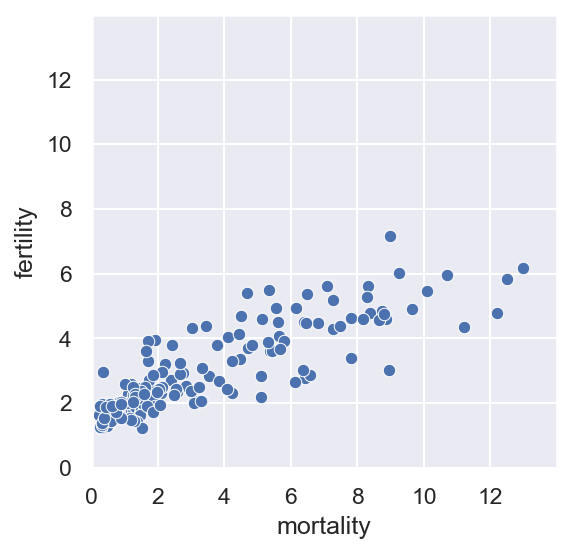

In [4]:
def scatter14(data):
    sns.scatterplot('mortality', 'fertility', data=data)
    plt.xlim([0, 14])
    plt.ylim([0, 14])
    plt.xticks(np.arange(0, 14, 2))
    plt.yticks(np.arange(0, 14, 2))    
    
scatter14(child_data)

<AxesSubplot:xlabel='mortality', ylabel='fertility'>

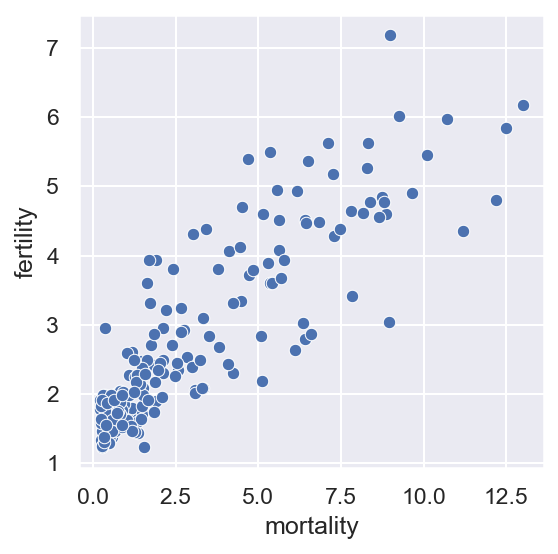

In [5]:
sns.scatterplot('mortality', 'fertility', data=child_data)

In [6]:
u, s, vt = np.linalg.svd(child_data, full_matrices = False)

In [7]:
child_data_reconstructed = pd.DataFrame(u @ np.diag(s) @ vt, columns = ["mortality", "fertility"], index=child_data.index)

As we'd expect, the product of $U$, $\Sigma$, and $V^T$ recovers the original data perfectly.

In [8]:
child_data_reconstructed.head(5)

,mortality,fertility
country,,
Afghanistan,6.820,4.48
Albania,1.330,1.71
Algeria,2.390,2.71
Angola,8.310,5.62
Antigua and Barbuda,0.816,2.04


<AxesSubplot:xlabel='mortality', ylabel='fertility'>

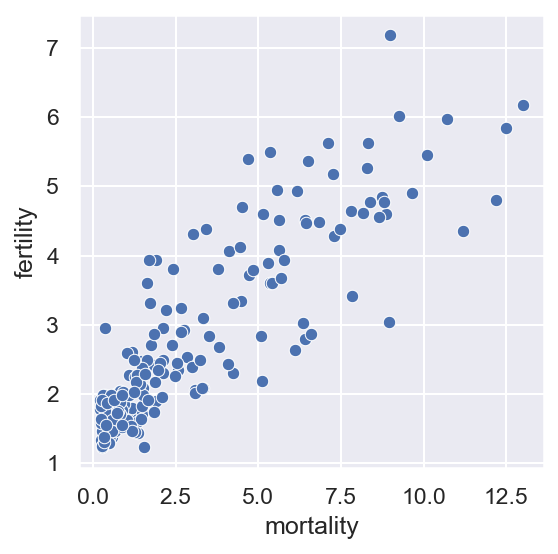

In [9]:
sns.scatterplot('mortality', 'fertility', data=child_data)

What happens if we throw away a column of $U$, a singular value from $\Sigma$, and a row from $V^T$? In this case we end up with the "rank 1 approximation" of the data.

Looking at the data, we see that it does a surprisingly good job.

In [10]:
#child_data_rank_1_approximation = pd.DataFrame(u[:, :-1] @ np.diag(s[:-1]) @ vt[:-1, :], columns = ["mortality", "fertility"], index=child_data.index)

child_data_rank_1_approximation = compute_rank_k_approximation(child_data, 1)
child_data_rank_1_approximation.head(5)

,mortality,fertility
0,6.694067,4.660869
1,1.697627,1.182004
2,2.880467,2.005579
3,8.232160,5.731795
4,1.506198,1.048719


By plotting the data in a 2D space, we can see what's going on. We're simply getting the original data projected on to some 1 dimensional subspace.

<AxesSubplot:xlabel='mortality', ylabel='fertility'>

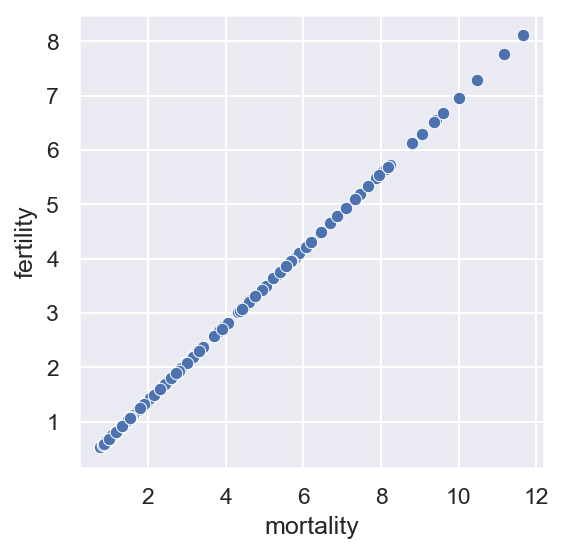

In [11]:
sns.scatterplot('mortality', 'fertility', data=child_data_rank_1_approximation)

There's one significant issue with our projection, which we can see by plotting both the original data and our reconstruction on the same axis. The issue is that the projection goes through the origin but our data has a non-zero y-intercept.

<AxesSubplot:xlabel='mortality', ylabel='fertility'>

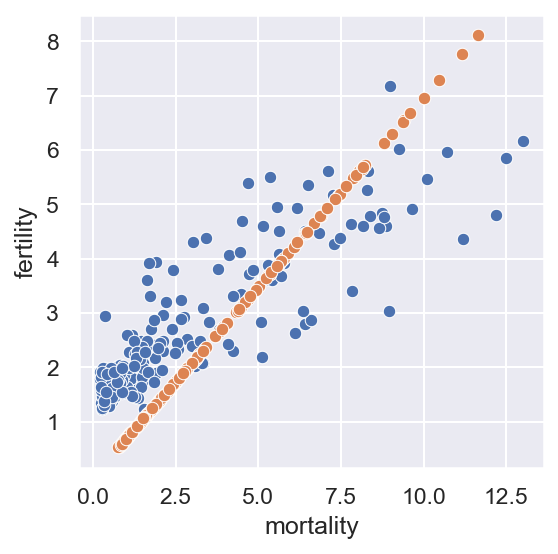

In [12]:
sns.scatterplot('mortality', 'fertility', data=child_data)
sns.scatterplot('mortality', 'fertility', data=child_data_rank_1_approximation)

While this y-intercept misalignment isn't terrible here, it can be really bad. For example, consider the 2D dataset below (from our body measurements dataset from the previous lecture).

In [13]:
#http://jse.amstat.org/datasets/fat.txt
body_data = pd.read_fwf("fat.dat.txt", colspecs = [(9, 13), (17, 21), (23, 29), (35, 37),
                                             (39, 45), (48, 53), (57, 61), (64, 69),
                                             (73, 77), (80, 85), (88, 93), (96, 101),
                                             (105, 109), (113, 117), (121, 125), (129, 133),
                                             (137, 141), (145, 149)], 
                  
                  
                  header=None, names = ["% brozek fat", "% siri fat", "density", "age", 
                                       "weight", "height", "adiposity", "fat free weight",
                                       "neck", "chest", "abdomen", "hip", "thigh",
                                       "knee", "ankle", "bicep", "forearm",
                                       "wrist"])
#body_data = body_data.drop(41) #drop the weird record
body_data.head()

,% brozek fat,% siri fat,density,age,weight,height,adiposity,fat free weight,neck,chest,abdomen,hip,thigh,knee,ankle,bicep,forearm,wrist
0,12.6,12.3,1.0708,23,154.25,67.75,23.7,134.9,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.9,6.1,1.0853,22,173.25,72.25,23.4,161.3,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,24.6,25.3,1.0414,22,154.00,66.25,24.7,116.0,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.9,10.4,1.0751,26,184.75,72.25,24.9,164.7,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,27.8,28.7,1.0340,24,184.25,71.25,25.6,133.1,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [14]:
density_and_abdomen = body_data[["density", "abdomen"]]
density_and_abdomen.head(5)

,density,abdomen
0,1.0708,85.2
1,1.0853,83.0
2,1.0414,87.9
3,1.0751,86.4
4,1.0340,100.0


If we look at the data, the rank 1 approximation looks at least vaguely sane from the table. 

In [15]:
density_and_abdomen_rank_1_approximation = compute_rank_k_approximation(density_and_abdomen, 1)
density_and_abdomen_rank_1_approximation.head(5)

,density,abdomen
0,0.957134,85.201277
1,0.932425,83.001717
2,0.987458,87.900606
3,0.970613,86.401174
4,1.123369,99.998996


But if we plot on 2D axes, we'll see that things are very wrong.

<AxesSubplot:xlabel='density', ylabel='abdomen'>

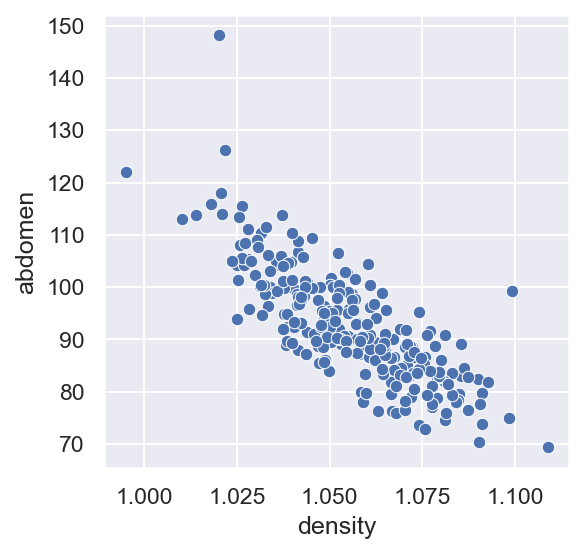

In [16]:
sns.scatterplot(x="density", y="abdomen", data=body_data)

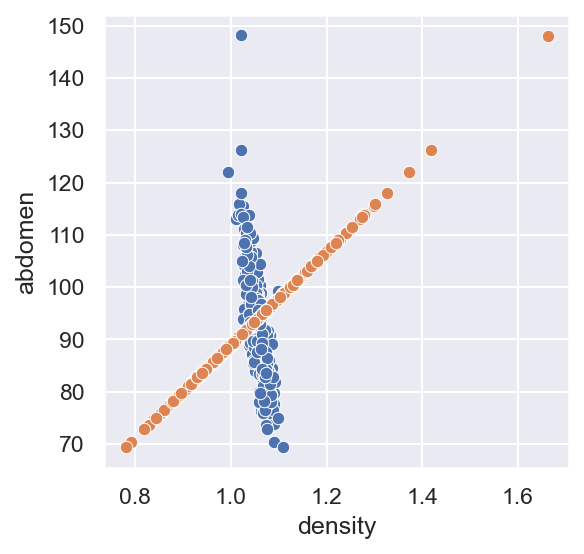

In [17]:
density_and_abdomen_rank_1_approximation = compute_rank_k_approximation(density_and_abdomen, 1)
sns.scatterplot(x="density", y="abdomen", data=body_data)
sns.scatterplot(x="density", y="abdomen", data=density_and_abdomen_rank_1_approximation);

Since the subspace that we're projecting on to is off and to the right, we end up with a bizarre result where our rank 1 approximation believes that density increases with abdomen size, even though the data shows the opposite.

To fix this issue, we should always start the SVD process by zero-centering our data. That is, for each column, we should subtract the mean of that column.

In [18]:
np.mean(density_and_abdomen, axis = 0)

density     1.055574
abdomen    92.555952
dtype: float64

In [19]:
density_and_abdomen_centered = density_and_abdomen - np.mean(density_and_abdomen, axis = 0)
density_and_abdomen_centered.head(5)

,density,abdomen
0,0.015226,-7.355952
1,0.029726,-9.555952
2,-0.014174,-4.655952
3,0.019526,-6.155952
4,-0.021574,7.444048


Now when we do the approximation, things work much better.

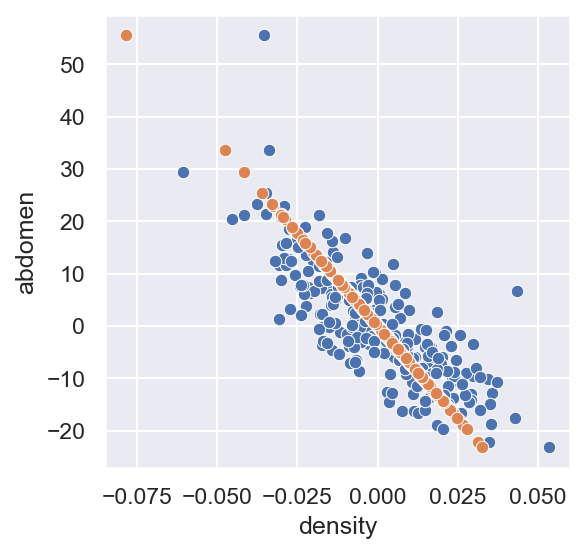

In [20]:
density_and_abdomen_centered_rank_1_approximation = compute_rank_k_approximation(density_and_abdomen_centered, 1)
sns.scatterplot(x="density", y="abdomen", data=density_and_abdomen_centered)
sns.scatterplot(x="density", y="abdomen", data=density_and_abdomen_centered_rank_1_approximation);

### Interpreting Principal Components

Let's revisit our child mortality and maternal fertility data from before.

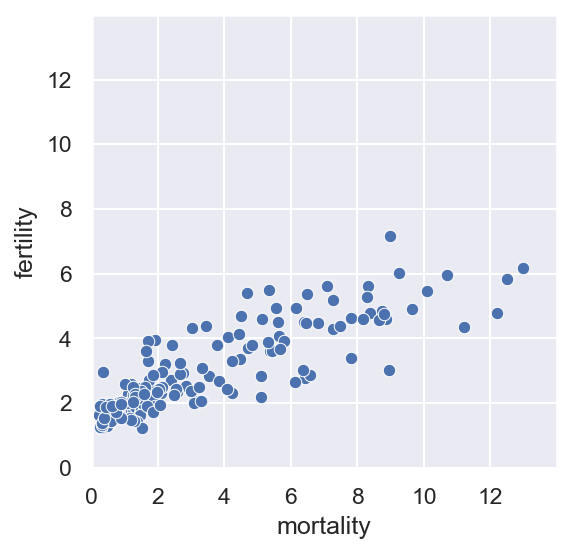

In [21]:
sns.scatterplot(data = child_data, x = "mortality", y= "fertility")
plt.xlim([0, 14])
plt.ylim([0, 14])
plt.xticks(np.arange(0, 14, 2))
plt.yticks(np.arange(0, 14, 2));

Since we're going to be doing SVD, let's make sure to center our data first.

In [22]:
np.mean(child_data, axis = 0)

mortality    3.034590
fertility    2.775956
dtype: float64

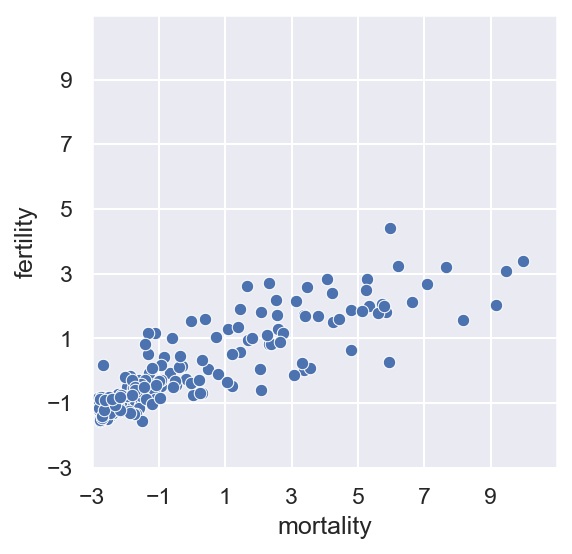

In [23]:
child_means = np.mean(child_data, axis = 0)
child_data_centered = child_data - child_means
sns.scatterplot(data = child_data_centered, x = "mortality", y= "fertility")


plt.xlim([-3, 11])
plt.ylim([-3, 11])
plt.xticks(np.arange(-3, 11, 2))
plt.yticks(np.arange(-3, 11, 2));
# plt.gcf().savefig("mortality_fertility_centered.png", dpi=300, bbox_inches="tight")

Tie in with the manual computation slides.

## Principal Components and Singular Values

###  Singular Values and Variance

In [24]:
rectangle = pd.read_csv('rectangle_data.csv')

In [25]:
rectangle_centered = rectangle - np.mean(rectangle, axis = 0)

In [26]:
np.var(rectangle_centered)

width          7.6891
height         5.3475
area         338.7316
perimeter     50.7904
dtype: float64

In [27]:
sum(np.var(rectangle_centered))

402.5586000000002

In [28]:
u, s, vt = np.linalg.svd(rectangle_centered, full_matrices = False)

In [29]:
u[0:5, :]

array([[-0.1339099 ,  0.00592996,  0.03473374, -0.43383848],
       [ 0.08635418, -0.07951453,  0.01494809, -0.02534001],
       [ 0.11776646, -0.12896256,  0.08577428, -0.09510982],
       [-0.02727392,  0.1831771 ,  0.01089507, -0.06410475],
       [-0.258806  , -0.09429499,  0.09027015, -0.0411881 ]])

In [30]:
np.diag(s)

array([[1.97388075e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.74346257e+01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.32626119e+01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.89517927e-15]])

In [31]:
s**2/rectangle_centered.shape[0]

array([3.89620522e+02, 7.52658687e+00, 5.41149115e+00, 3.47531387e-31])

In [32]:
sum(s**2/rectangle_centered.shape[0])

402.55860000000007

## Practical PCA

Let's now step back and try to use PCA on our body measurement and congressional voting datasets.

In [33]:
body_data.head(5)

,% brozek fat,% siri fat,density,age,weight,height,adiposity,fat free weight,neck,chest,abdomen,hip,thigh,knee,ankle,bicep,forearm,wrist
0,12.6,12.3,1.0708,23,154.25,67.75,23.7,134.9,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.9,6.1,1.0853,22,173.25,72.25,23.4,161.3,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,24.6,25.3,1.0414,22,154.00,66.25,24.7,116.0,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.9,10.4,1.0751,26,184.75,72.25,24.9,164.7,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,27.8,28.7,1.0340,24,184.25,71.25,25.6,133.1,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [34]:
u, s, vt = np.linalg.svd(body_data, full_matrices = False)

We see that some of our singular values capture more variance than others.

In [35]:
s

array([5.02052705e+03, 2.62085056e+02, 2.54543432e+02, 1.41812428e+02,
       5.98783810e+01, 5.29106976e+01, 4.16567900e+01, 3.12823306e+01,
       2.60271725e+01, 2.44919558e+01, 2.21128215e+01, 2.05280695e+01,
       1.86667123e+01, 1.67184654e+01, 1.24277631e+01, 7.79276210e+00,
       1.97067950e+00, 2.72193414e-01])

Or we can compute the fraction of the variance captured by each principal component. The result seems shocking at first, as our data appears to be effectively rank 1.

In [36]:
np.round(s**2 / sum(s**2), 2)

array([0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

This seems absurd, as clearly there are several variables that we expect to be show significant variation independent of each other, e.g. weight, height, and age. If this happens to you, it's probably because you forgot to center your data!

In [37]:
body_data_centered = body_data - np.mean(body_data, axis = 0)
body_data_centered.head(5)

,% brozek fat,% siri fat,density,age,weight,height,adiposity,fat free weight,neck,chest,abdomen,hip,thigh,knee,ankle,bicep,forearm,wrist
0,-6.338492,-6.850794,0.015226,-21.884921,-24.674405,-2.39881,-1.736905,-8.813889,-1.792063,-7.724206,-7.355952,-5.404762,-0.405952,-1.290476,-1.202381,-0.273413,-1.263889,-1.129762
1,-12.038492,-13.050794,0.029726,-22.884921,-5.674405,2.10119,-2.036905,17.586111,0.507937,-7.224206,-9.555952,-1.204762,-0.705952,-1.290476,0.297619,-1.773413,0.236111,-0.029762
2,5.661508,6.149206,-0.014174,-22.884921,-24.924405,-3.89881,-0.736905,-27.713889,-3.992063,-5.024206,-4.655952,-0.704762,0.194048,0.309524,0.897619,-3.473413,-3.463889,-1.629762
3,-8.038492,-8.750794,0.019526,-18.884921,5.825595,2.10119,-0.536905,20.986111,-0.592063,0.975794,-6.155952,1.295238,0.694048,-1.290476,-0.302381,0.126587,0.736111,-0.029762
4,8.861508,9.549206,-0.021574,-20.884921,5.325595,1.10119,0.163095,-10.613889,-3.592063,-3.524206,7.444048,1.995238,3.794048,3.609524,0.897619,-0.073413,-0.963889,-0.529762


In [38]:
u, s, vt = np.linalg.svd(body_data_centered, full_matrices = False)

This time, we see that the top singular value is no longer as dominant.

In [39]:
s

array([5.86347268e+02, 2.61819089e+02, 1.67113835e+02, 5.99708077e+01,
       5.33302486e+01, 4.22415004e+01, 3.48011060e+01, 2.92855997e+01,
       2.55426169e+01, 2.39181665e+01, 2.08396531e+01, 2.04736098e+01,
       1.85404097e+01, 1.62788697e+01, 1.23779482e+01, 7.72010337e+00,
       1.95363897e+00, 4.48706065e-02])

Looking now at the fraction of the variance captured by each principal component, we see that the top 2 or 3 principal components capture quite a lot of the variance.

In [40]:
np.round(s**2 / sum(s**2), 2)

array([0.76, 0.15, 0.06, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

We can also show this in the form of what is usually called a "scree plot".

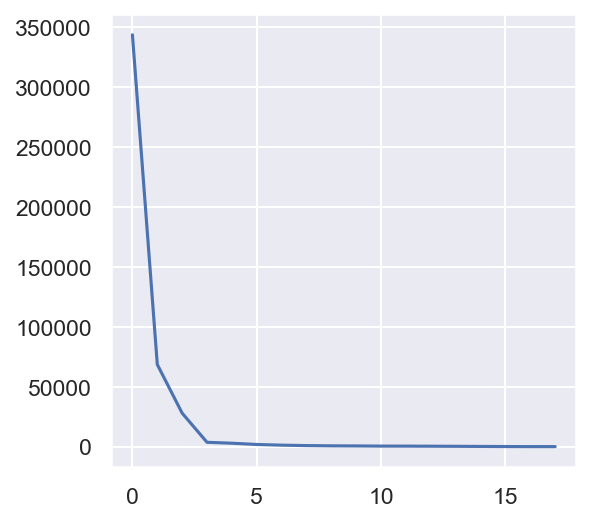

In [41]:
plt.plot(s**2);

Thus, we expect that if we were to do a rank 3 approximation, we should get back data that's pretty close to where we started, as just those 3 dimensions capture 97% of the variance.

In [42]:
body_data_rank_3_approximation = compute_rank_k_approximation(body_data_centered, 3) +  np.mean(body_data, axis = 0)
body_data_rank_3_approximation.head(5)

,% brozek fat,% siri fat,density,age,weight,height,adiposity,fat free weight,neck,chest,abdomen,hip,thigh,knee,ankle,bicep,forearm,wrist
0,13.732084,13.499443,1.067647,23.406671,155.524219,69.685017,22.382014,134.660313,35.750451,92.404761,81.663261,95.367676,57.832005,36.807149,22.471102,30.513755,27.871398,17.221299
1,6.949481,6.177696,1.084653,22.136786,173.262498,72.818426,22.848506,161.108343,37.281215,94.764794,81.952662,98.256188,59.629903,38.251464,23.494178,31.990484,28.799694,18.014750
2,24.388640,24.995400,1.041272,22.012988,155.515375,66.961498,24.013328,115.107332,35.327536,94.623409,87.487254,96.824325,59.191562,36.564650,22.049234,30.526265,27.727128,16.734867
3,10.535884,10.053321,1.076052,26.287526,185.315285,72.840641,24.486712,164.078362,38.187196,98.649630,87.304458,101.045858,61.263963,39.095345,23.826619,32.953935,29.261160,18.327856
4,27.324362,28.164091,1.034484,23.983222,184.352508,68.475540,26.973751,132.523943,37.446408,101.921954,96.240973,103.147363,63.286670,38.642499,23.123048,32.896046,28.991277,17.530191


In [43]:
body_data.head(5)

,% brozek fat,% siri fat,density,age,weight,height,adiposity,fat free weight,neck,chest,abdomen,hip,thigh,knee,ankle,bicep,forearm,wrist
0,12.6,12.3,1.0708,23,154.25,67.75,23.7,134.9,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.9,6.1,1.0853,22,173.25,72.25,23.4,161.3,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,24.6,25.3,1.0414,22,154.00,66.25,24.7,116.0,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.9,10.4,1.0751,26,184.75,72.25,24.9,164.7,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,27.8,28.7,1.0340,24,184.25,71.25,25.6,133.1,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


One very interesting thing we can do is try to plot the principal components themselves. In this case, let's plot only the first two.

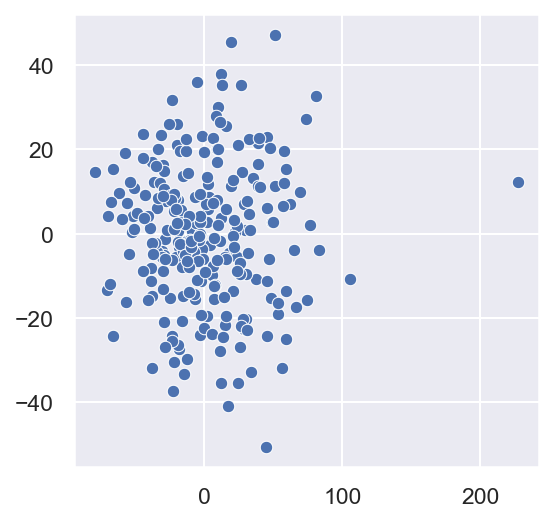

In [44]:
u, s, vt = np.linalg.svd(body_data_centered, full_matrices = False)
pcs = u * s
sns.scatterplot(x=pcs[:, 0], y=pcs[:, 1]);

In [45]:
np.argmax(pcs[:, 0])

38

In [46]:
body_data.iloc[38, :]

% brozek fat        33.8000
% siri fat          35.2000
density              1.0202
age                 46.0000
weight             363.1500
height              72.2500
adiposity           48.9000
fat free weight    240.5000
neck                51.2000
chest              136.2000
abdomen            148.1000
hip                147.7000
thigh               87.3000
knee                49.1000
ankle               29.6000
bicep               45.0000
forearm             29.0000
wrist               21.4000
Name: 38, dtype: float64